In [ ]:
import numpy as np
import pandas as pd
import ruptures as rpt
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('dark_background')

df = pd.read_csv('data/clean_data.csv')

In [ ]:
signal = df['accuracy_1_%'].values
model = rpt.Pelt(model="rbf", min_size=5).fit(signal)
changes_pelt = model.predict(pen=0.1)

changes_pelt = [cp for cp in changes_pelt if cp < len(df)]

In [ ]:
indexes = [0] + changes_pelt + [len(signal)-1]

p-value > 0.05 → не отвергаем H₀ (нормальность).

p-value ≤ 0.05 → отвергаем H₀ (ненормальность).

In [ ]:
for i in range(len(indexes) - 1):
    data = signal[indexes[i]:indexes[i+1]]
    shapiro_test = stats.shapiro(data)

    print(f"[{indexes[i]}, {indexes[i+1]}] - {shapiro_test.pvalue > 0.05}, W = {shapiro_test.statistic:.3f}")


W - уверенность в результате [0,1]

In [ ]:
shapiro_test = stats.shapiro(signal)
print(f"Shapiro-Wilk test: W={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}")

In [ ]:
# stds = []
# for i in range(len(indexes) - 1):
#     data = signal[indexes[i]:indexes[i+1]]

#     stds += []

#     #print(f"{data.std():.3f}")

stds = [signal[indexes[i]:indexes[i+1]].std() for i in range(len(indexes) - 1)]

plt.plot(stds)

Тест Уэлча для проверки значимости в различии средних соседних выборок (при различной дисперсии)

Тест Бартлетт для проверки значимости в различии дисперсий соседних выборок

In [ ]:
significant_diff = []

for i in range(len(indexes) - 2):
    data1 = signal[indexes[i]:indexes[i+1]]
    data2 = signal[indexes[i+1]:indexes[i+2]]

    if (stats.ttest_ind(data1, data2, equal_var=False).pvalue > 0.05) \
        and (stats.levene(data1, data2).pvalue > 0.05):

        significant_diff.append(indexes[i+1])


    # print(f"{indexes[i+1]} \
    #        - mean: {stats.ttest_ind(data1, data2, equal_var=False).pvalue > 0.05} \
    #        - std: {stats.bartlett(data1, data2).pvalue > 0.05} \
    #        ")

In [ ]:
plt.figure(figsize=(10, 2))
plt.plot(df['date'], df['accuracy_1_%'], alpha=0.5, color='lightgreen', label='Исходные данные', zorder=2)

# for window_size in [14]:
#     df['smoothed'] = df['accuracy_1_%'].rolling(window=window_size).mean()
#     plt.plot(df['date'], df['smoothed'], linewidth=2, color='skyblue', 
#             label=f'Скользящее среднее (окно {window_size})', zorder=3)

significant_diff = [cp for cp in significant_diff if cp < len(df)]

for cp in significant_diff:
    plt.axvline(df['date'].iloc[cp], color="red", 
                linestyle='--', zorder=1, 
                label="pelt" if cp == significant_diff[0] else "")

plt.legend()

bartlett

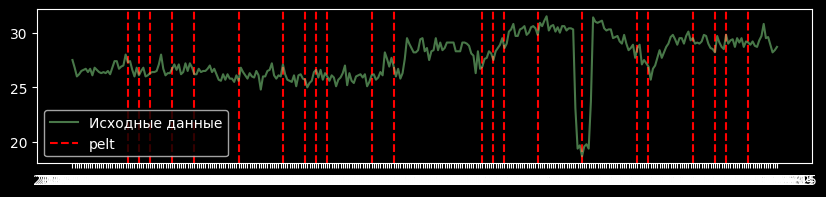

levene

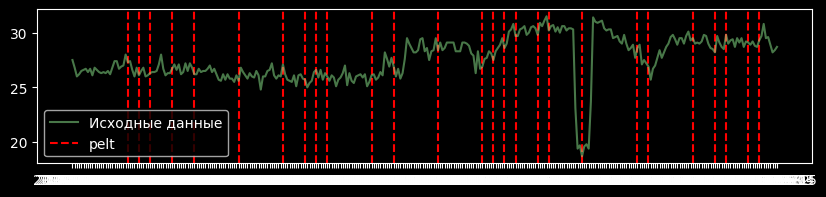